In [10]:
import matplotlib.pyplot as plt
import networkx          as nx
import sys

In [11]:
class DiGraph_Simulations:

    def __init__(self):
        self.dg = nx.DiGraph()
        self.E  = []
        self.pl = []
        self.V  = 0
        self.nE = 0

    def create_DiGraph(self, weighted_edges_arr):
        self.dg.add_weighted_edges_from(weighted_edges_arr)
        self.E  = [(u, v) for (u, v, w) in self.dg.edges(data=True)]
        self.pl = [(u-1, v-1, w) for (u, v, w) in weighted_edges_arr]
        self.V  = self.dg.number_of_nodes()
        self.nE = self.dg.number_of_edges()

    def draw_DiGraph(self, seed_no):
        pos = nx.spring_layout( self.dg, seed=seed_no) 
        nx.draw_networkx_nodes( self.dg, pos, node_size=700)
        nx.draw_networkx_edges( self.dg, pos, edgelist=self.E, 
                                width=4, alpha=0.5, edge_color="g")
        nx.draw_networkx_labels(self.dg, pos, font_size=20, 
                                font_family="sans-serif")

        ax = plt.gca()
        ax.margins(0.08)    
        plt.axis("off")
        plt.tight_layout()
        plt.show()

    def print_weight(self, result):
        total_w = 0
        for i in range(len(result)):
            u, v, w  = result[i]
            total_w += w

        print(total_w)

################----------------------------------------------------------------Prims--Algorithm---------------------------------------------------################
        
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_UNION(self, parent, rank , x, y):
        x_root = self.find(parent, x)
        y_root = self.find(parent, y)

        if      rank[x_root] < rank[y_root]:
            parent[x_root] = y_root
        elif    rank[x_root] > rank[y_root]:
            parent[y_root] = x_root
        else:
            parent[y_root]  = x_root
            rank[x_root]   += 1

    def Kruskals_MST(self, seed_no):
        result = []
        i, e = 0, 0
        self.pl  = sorted(self.pl, key=lambda item: item[2])
        parent = []
        rank   = []

        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.pl[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e += 1
                result.append([u, v, w])
                self.apply_UNION(parent, rank, x, y)

        for u, v, weight in result:
            print("%d - %d: %.2f" % (u+1, v+1, weight))

        self.print_weight(result)
        pos = nx.spring_layout( self.dg, seed=seed_no) 
        nx.draw_networkx_nodes( self.dg, pos, node_size=700)
        nx.draw_networkx_edges( self.dg, pos, edgelist=self.E,
                                width=4, alpha=0.5, edge_color="g")
        nx.draw_networkx_edges( self.dg, pos, 
                                edgelist=[(u+1,v+1) for (u,v,w) in result],
                                width=4, alpha=0.5, edge_color="b")
        nx.draw_networkx_labels(self.dg, pos, font_size=20,
                                font_family="sans-serif")

        ax = plt.gca()
        ax.margins(0.08)    
        plt.axis("off")
        plt.tight_layout()
        plt.show()

################----------------------------------------------------------Kruskals--Algorithm------------------------------------------------------################

    def generate_matrix(self):
        
        self.adj_matrix = [[0 for j in range(self.V)]
                              for i in range(self.V)]
        for i in range(self.V):
            u, v, w = self.pl[i]
            self.adj_matrix[u][v] = w

    def Prims_MST(self, seed_no):
        selected = [0 for i in range(self.nE)]
        no_edge  = 0
        node_lis  = [0 for j in range(self.V)]
        result   = []

        selected[0] = True
        while(no_edge <= self.V ): 
            minimum = int(sys.maxsize)
            x = 0
            y = 0
            for i in range(self.V):
                if selected[i]:
                    for j in range(self.V):
                        if (selected[j]!=True and self.adj_matrix[i][j] 
                            and minimum > self.adj_matrix[i][j]):
                                minimum = self.adj_matrix[i][j]
                                x = i
                                y = j
            if x != y: 
                result.append([x, y, self.adj_matrix[x][y]])
                selected[y] = True
                node_lis[x] = 1
                node_lis[y] = 1
            no_edge += 1
        temp_arr = []
        m = 0
        n = 0
        it = 0
        while( it < len(node_lis)):
            if (node_lis[it] == 0):
                temp_arr.append(it)
            it +=1
    
        for x in temp_arr:
            w_min = sys.maxsize
            for i in range(self.nE):
                u, v, w = self.pl[i]
                if ( u == x or v == x):
                    if (w_min > w):
                        m = u
                        n = v
                        w_min = w
            result.append([m, n, w_min])


        for u, v, weight in result:
            print("%d - %d: %.2f" % (u+1, v+1, weight))
        self.print_weight(result)
        pos = nx.spring_layout( self.dg, seed=seed_no) 
        nx.draw_networkx_nodes( self.dg, pos, node_size=700)
        nx.draw_networkx_edges( self.dg, pos, edgelist=self.E, width=4, 
                                alpha=0.5, edge_color="g")
        nx.draw_networkx_edges( self.dg, pos, 
                                edgelist=[(u+1,v+1) for (u,v,w) in result],
                                width=4, alpha=0.5, edge_color="orange")
        nx.draw_networkx_labels(self.dg, pos, font_size=20,
                                font_family="sans-serif")

        ax = plt.gca()
        ax.margins(0.08)    
        plt.axis("off")
        plt.tight_layout()
        plt.show()  

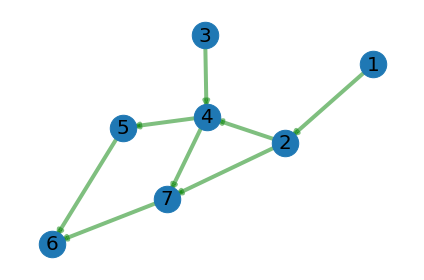

4 - 7: 0.25
1 - 2: 0.50
2 - 7: 0.50
3 - 4: 0.50
4 - 5: 0.50
5 - 6: 0.50
2.75


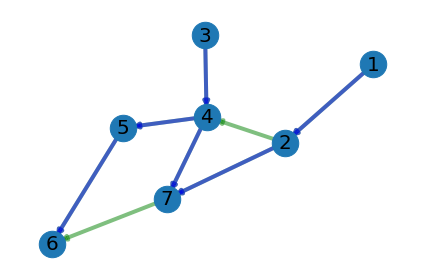

1 - 2: 0.50
2 - 4: 0.50
4 - 7: 0.25
4 - 5: 0.50
5 - 6: 0.50
3 - 4: 0.50
2.75


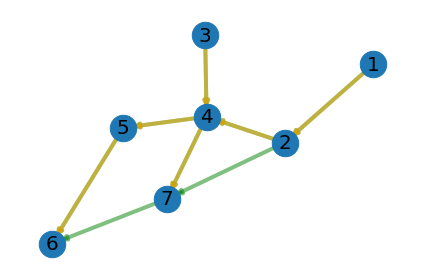

In [12]:
input_list = [(1,2,0.5),(2,7,0.5),(2,4,0.5),(4,7,0.25),
              (3,4,0.5),(4,5,0.5),(7,6,0.75),(5,6,0.5)]

X = DiGraph_Simulations()
X.create_DiGraph(input_list)
X.draw_DiGraph(7)
X.Kruskals_MST(7)
X.generate_matrix()
X.Prims_MST(7)

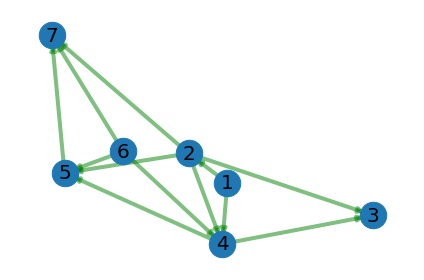

4 - 3: 0.12
4 - 5: 0.12
5 - 7: 0.25
1 - 2: 0.50
1 - 4: 0.50
6 - 4: 0.50
2.0


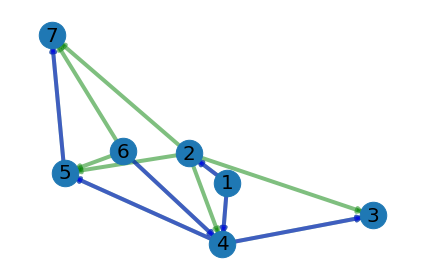

1 - 2: 0.50
1 - 4: 0.50
4 - 3: 0.12
4 - 5: 0.12
5 - 7: 0.25
6 - 4: 0.50
2.0


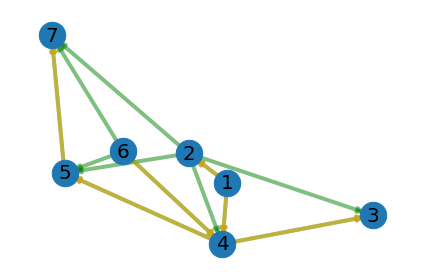

In [13]:
input_list=[(1,2,0.5),(1,4,0.5),(2 ,3,0.5),(2,4,0.5),(2,5,0.5),
            (2,7,0.5),(4,3,0.125),(4,5,0.125),(5,7,0.25),(6,4,0.5),
            (6,5,0.5),(6,7,0.5)]

X = DiGraph_Simulations()
X.create_DiGraph(input_list)
X.draw_DiGraph(5)
X.Kruskals_MST(5)
X.generate_matrix()
X.Prims_MST(5)

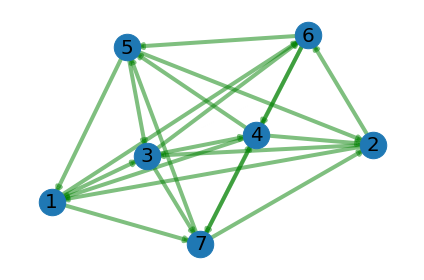

2 - 1: 0.12
6 - 4: 0.12
6 - 5: 0.20
1 - 6: 0.25
3 - 6: 0.25
7 - 2: 0.25
1.2


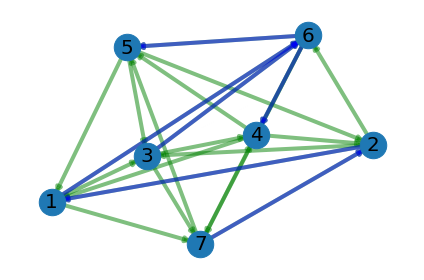

1 - 6: 0.25
6 - 4: 0.12
6 - 5: 0.20
2 - 1: 0.12
3 - 6: 0.25
7 - 2: 0.25
1.2


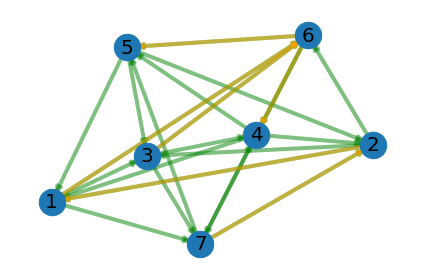

In [14]:
input_list=[(1,3,0.5),(1,6,0.25),(1,7,0.9),(2,1,0.125),
            (2,3,0.5),(2,6,0.4),(3,4,0.5),(3,6,0.25),
            (3,7,0.7),(4,1,0.34),(4,2,0.75),(4,5,0.4),
            (5,1,0.3),(5,2,0.4),(5,3,0.3),(6,4,0.125),
            (6,5,0.2),(6,7,0.4),(7,2,0.25),(7,4,0.4),(7,5,0.3)]

X = DiGraph_Simulations()
X.create_DiGraph(input_list)
X.draw_DiGraph(26)
X.Kruskals_MST(26)
X.generate_matrix()
X.Prims_MST(26)